### Persistent homology examples

* Ripser [paper](https://www.theoj.org/joss-papers/joss.00925/10.21105.joss.00925.pdf) [code](https://github.com/scikit-tda/ripser.py) (fast)
* Dionysus 2 [code](https://mrzv.org/software/dionysus2/) (representative examples)
* Nico's [code](https://github.com/nhchristianson/Math-text-semantic-networks)
* Ann's [code](https://github.com/asizemore/PH_tutorial/blob/master/Tutorial_day1.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

### Try persistent homology

In [2]:
import wiki

topic = 'biochemistry'
path_saved = '/Users/harangju/Box Sync/Research/my papers/wikipedia paper/data/graphs/full/'
network = wiki.Net()
network.load_graph(path_saved + topic + '.gexf')

In [3]:
%time network.barcodes

wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 11234/11251
CPU times: user 13 s, sys: 954 ms, total: 13.9 s
Wall time: 14.8 s


,dim,birth,death,birth simplex,death nodes,death simplex
0,0,-2500,inf,[Carbon],[],[]
1,0,-2500,800.0,[Nutrition],[Ethanol],"[Ethanol, Ammonia]"
2,0,-2000,-2000.0,[Alcohol],[Alcohol],"[Carbon, Alcohol]"
3,0,-2000,1600.0,[Medicine],[Life],"[Life, Microbiology]"
4,0,-2000,-2000.0,[Pharmacist],"[Medicine, Pharmacist]","[Medicine, Pharmacist]"
...,...,...,...,...,...,...
6041,5,1911,1911.0,"[Electron, Proton, Atomic nucleus, Atomic numb...",[Atomic nucleus],"[Atom, Electron, Proton, Atomic nucleus, Atomi..."
6042,5,1911,1911.0,"[Electron, Atomic nucleus, Neutron, Atomic num...",[Atomic nucleus],"[Atom, Electron, Atomic nucleus, Neutron, Atom..."
6043,5,1911,1911.0,"[Hydrogen, Proton, Atomic nucleus, Neutron, At...",[Atomic nucleus],"[Atom, Hydrogen, Proton, Atomic nucleus, Neutr..."
6044,5,1911,1911.0,"[Proton, Atomic nucleus, Neutron, Atomic numbe...",[Atomic nucleus],"[Atom, Proton, Atomic nucleus, Neutron, Atomic..."


### Plot

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

sns.set(style='white', font_scale=2)

In [5]:
def plot_barcodes(barcodes):
    """
    """
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
          for c in ['emerald green', 'tealish', 'peacock blue', 
                    'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(15,6))
    for i, row in barcodes.iterrows():
        birth = row['birth']
        death = row['death']
        x = [birth, 2050] if death==np.inf else\
            [birth, death]
        plt.plot(x, i*np.ones(len(x)), colors[row['dim']])
        if death != np.inf:
            plt.plot(death, i, 'r.')
    plt.axvline(x=2040, linestyle='--', color=mcd.XKCD_COLORS['xkcd:grey'])
    plt.gca().axes.yaxis.set_ticklabels([])

In [6]:
def plot_persistence_diagram(barcodes):
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
      for c in ['emerald green', 'tealish', 'peacock blue', 
                'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(10,10))
    for dim in set(barcodes['dim']):
        data = barcodes.loc[barcodes['dim']==dim]
        data.loc[data['death']==np.inf,'death'] = 2030
        plt.plot(data['birth'], data['death'], '.')
    x = [barcodes['birth'].min(),
         barcodes.loc[barcodes['death']!=np.inf,'death'].max()]
    print(x)
    plt.plot(x, [2030, 2030], '--')

CPU times: user 1min 6s, sys: 627 ms, total: 1min 7s
Wall time: 1min 9s


Text(0.5, 1.0, 'biochemistry')

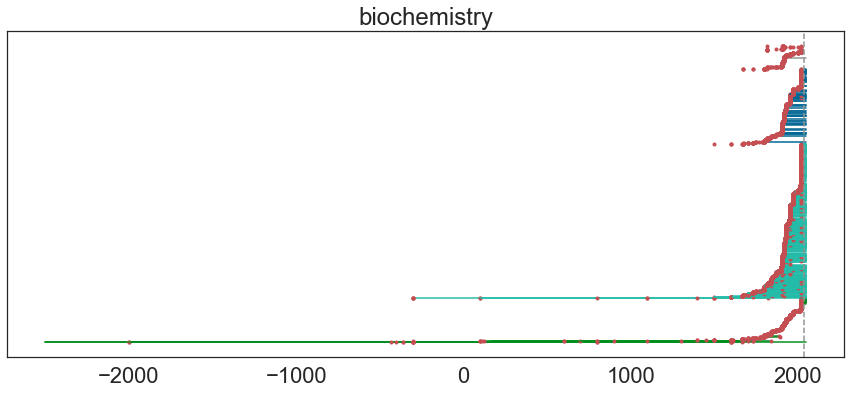

In [8]:
%time plot_barcodes(network.barcodes)
plt.title(topic)
# %time plot_persistence_diagram(barcodes.loc[barcodes['birth']>1900])

In [23]:
list(network.barcodes['death nodes'])[:5]

[[], ['Ethanol'], ['Alcohol'], ['Life'], ['Medicine', 'Pharmacist']]